# Testbeam - Checking for Missing HCAL Detectors
<b>Author:</b> Cooper Froemming
<br><b>Date:</b> May 19th, 2022
<br><b>Description:</b> This document aims to determine what which detectors are missing from the pedestal calibration files used in the CERN CMS Testbeam on April, 2022

## Imports / Initializations:

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
# Keeps track of file information
class File: 
    def __init__(self, path, name, treePath):
        self.path = path
        self.name = name
        if treePath == 'default' :
            self.treePath = ':ntuplizehgcroc/hgcroc'
        else :
            self.treePath = treePath
    def setTreePath(localTPath):
        treePath = localTPath

In [148]:
folderPath = '/home/cfroemming/ldmx/sandbox/jeremyPed/'

#All of the different pedestal files.
ped0415 = File(folderPath,'pedestals_20220415.csv','default')
ped0416 = File(folderPath,'pedestals_20220416.csv','default')
ped0417 = File(folderPath,'pedestals_20220417.csv','default')
ped0419 = File(folderPath,'pedestals_20220419.csv','default')
ped0421 = File(folderPath,'pedestals_20220421.csv','default')
ped0422 = File(folderPath,'pedestals_20220422.csv','default')
ped0423 = File(folderPath,'pedestals_20220423.csv','default')
ped0424_07 = File(folderPath,'pedestals_20220424_07.csv','default')
ped0424_22 = File(folderPath,'pedestals_20220424_22.csv','default')
ped0426 = File(folderPath,'pedestals_20220426.csv','default')
fileArray = [ped0415, ped0416, ped0417, ped0419, ped0421, ped0422, ped0423, ped0424_07, ped0424_22, ped0426]

In [149]:
master = pd.read_csv(f'{folderPath}''hcal_detids_hex.txt',names=['Master'],header=0)
detID_index = pd.Index(master.iloc[:,0])

# input_file1 = ped0415
# file_to_open1 = f'{input_file1.path}{input_file1.name}'

# initialFile = pd.read_csv(f'{file_to_open1}',comment='#',index_col=0)
# newFile = pd.read_csv(f'{ped0423.path}{ped0423.name}',comment='#',index_col=0)

In [150]:
# test = pd.read_csv(f'{ped0422.path}{ped0422.name}',comment='#',index_col=0)
# test1 = test.loc[(test.duplicated() == True)]
# master
# test

## Checking for Missing Channels:
This effectively finds all of the missing channels.
<br><br><i> FIXME: Write a better description</i>

In [151]:
count = 0
missingDet = pd.DataFrame(index=detID_index, columns=['PEDESTAL_ADC','PEDESTAL_RMS_ADC'])
missingHist = pd.DataFrame(index=detID_index, columns=['PEDESTAL_ADC','PEDESTAL_RMS_ADC'],dtype=np.int64)
missingHist[:] = 0
missingDet = ~missingDet.isna()


# Note: Skipping ped0422 because it does not follow the same naming conventions in the csv file as the others
for x in fileArray:
    if (count > 5) | (count < 5):
        currentFile = pd.read_csv(f'{x.path}{x.name}',comment='#',index_col=0)
        print('Checking ',x.name,'...',sep='')
        if currentFile.size % 384 != 0:
            currentFile = currentFile.reindex(detID_index, copy=True)
        currentFile = currentFile.isna()
        missingHist = missingHist.add(currentFile*1,axis=0)
        missingDet = (missingDet | currentFile)
    count = count + 1

Checking pedestals_20220415.csv...
Checking pedestals_20220416.csv...
Checking pedestals_20220417.csv...
Checking pedestals_20220419.csv...
Checking pedestals_20220421.csv...
Checking pedestals_20220423.csv...
Checking pedestals_20220424_07.csv...
Checking pedestals_20220424_22.csv...
Checking pedestals_20220426.csv...


### Visual Representation of Missing Channels
<i>FIXME: write a description. </i>

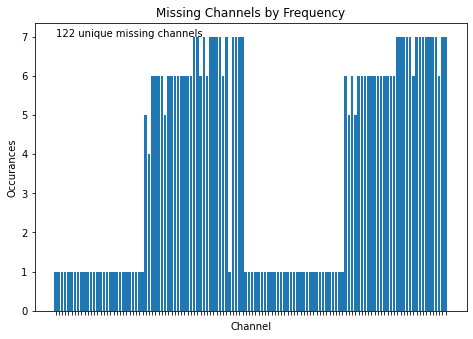

In [152]:
missingDet[(missingDet['PEDESTAL_ADC'] == True)]
output = missingHist[(missingHist['PEDESTAL_ADC'] != 0)]

fig = plt.figure()
HB = fig.add_axes([0,0,1,1])
HB.bar(x=output.index,height=output['PEDESTAL_ADC'],tick_label='')
HB.set_title('Missing Channels by Frequency')
HB.set_ylabel('Occurances')
HB.set_xlabel('Channel')
numCh = missingDet[(missingDet['PEDESTAL_ADC'] == True)].shape
HB.annotate(f'{numCh[0]} unique missing channels',(0,7))
plt.show()


### Garbage Can:
This is for personal reference of some commands that I found useful, but is not currently used. These probably aren't useful to you.

In [153]:
# Renaming Column Labels
# data = initialFile.reindex(detID_index)
# data = data.rename(columns={'PEDESTAL_ADC':'ADC','PEDESTAL_RMS_ADC':'RMS'})
# newData = newFile.reindex(detID_index)
# newData = newData.rename(columns={'PEDESTAL_ADC':'ADC','PEDESTAL_RMS_ADC':'RMS'})

In [154]:
# Boolean testing
# data1 = data.isna()
# data2 = newData.isna()
# data3 = (data1 | data2)
# dataLast = newData.loc[(data3.ADC == True)]
# dataLast.shape
# data1.loc['0x18881107']
# data2.loc['0x18881107']

In [155]:
# Number of channels test
# test = newData.iloc[380,1]
# count = 0

# for x in range(0,384):
#     val = newData.iloc[x,0]
#     if np.isnan(val):
#         count = count + 1
# print('Number of Missing Channels:',count)